# How does the maximum length effect blast and diamond in terms of coputational cost?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')

In [2]:
!dvc exp show -A --csv > './data/alignment_cost.csv'

In [3]:
df = pd.read_csv('./data/alignment_cost.csv')

In [4]:
df

,Experiment,rev,typ,Created,parent,State,Executor,n_have_bacdive,n_have_growth_temp,n_have_ogt,...,learn2therm/blast.py,learn2therm/io.py,learn2therm/utils.py,pipeline/s0.0_get_ncbi_refseq.sh,pipeline/s0.1_get_bacdive_ogt.py,pipeline/s1.0_label_taxa.py,pipeline/s1.1_get_protein_sequences.py,pipeline/s1.2_get_16s_blast_scores.py,pipeline/s1.3_label_all_pairs.py,pipeline/s1.4_get_protein_blast_scores.py
0,NaN,workspace,baseline,NaN,NaN,NaN,NaN,11597,5059,4424,...,NaN,3be212c,NaN,837b5f5,237229b,c0fcb9f,5f3f687,575ae8c,f0d9170,19ccb60
1,main,f3b9111,baseline,2022-11-22T09:22:38,NaN,NaN,NaN,11597,5059,4424,...,NaN,3be212c,NaN,837b5f5,237229b,c0fcb9f,5f3f687,575ae8c,f0d9170,19ccb60
2,NaN,5946889,baseline,2022-11-21T12:31:21,NaN,NaN,NaN,11597,5059,4424,...,NaN,dde1031,NaN,837b5f5,237229b,c0fcb9f,5f3f687,575ae8c,f0d9170,19ccb60
3,NaN,5bd904d,baseline,2022-11-21T10:38:55,NaN,NaN,NaN,11597,5059,4424,...,NaN,NaN,NaN,837b5f5,237229b,c0fcb9f,5f3f687,266bbd5,a2f4ec4,19ccb60
4,NaN,18ecef1,baseline,2022-11-18T11:20:31,NaN,NaN,NaN,11597,5059,4424,...,NaN,NaN,NaN,837b5f5,237229b,c0fcb9f,5f3f687,266bbd5,a2f4ec4,19ccb60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,NaN,8cdff79,baseline,2022-09-30T11:04:11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,8dfc6fa,baseline,2022-09-30T11:03:30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,NaN,ff367f8,baseline,2022-09-30T09:12:32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,NaN,053aeec,baseline,2022-09-27T14:55:27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(list(df.columns))

['Experiment', 'rev', 'typ', 'Created', 'parent', 'State', 'Executor', 'n_have_bacdive', 'n_have_growth_temp', 'n_have_ogt', 'n_taxa', 'n_meso', 'n_therm', 'n_taxa_with_16srRNA', 'n_total_sequences', 'percent_full_pairwise_16s_blast', 'num_pairs_conservative', 'true_pair_ratio', 'apx_co2_per_pair_avg', 'apx_co2_per_pair_std', 'apx_hits_per_pair_avg', 'apx_hits_per_pair_std', 'apx_minutes_per_pair_avg', 'apx_minutes_per_pair_std', 'apx_perc_protein_pairwise', 'blastp_kg_CO2_per_pair', 'blastp_time_per_pair', 'percent_full_pairwise_blastp', '../params.yaml:get_bacdive_ogt.n_jobs', '../params.yaml:get_bacdive_ogt.n_sample', '../params.yaml:get_protein_sequences.n_jobs', '../params.yaml:get_protein_sequences.n_sample', '../params.yaml:label_taxa.ogt_threshold', '../params.yaml:label_taxa.ogt_determination_method', 'get_16s_blast_scores.num_threads', '../params.yaml:get_16s_blast_scores.word_size', '../params.yaml:get_16s_blast_scores.gapopen_penalty', '../params.yaml:get_16s_blast_scores.g

In [6]:
df = df[['../params.yaml:get_protein_blast_scores.max_protein_length', 'get_protein_blast_scores.method', 'get_protein_blast_scores.method_diamond_params.sensitivity', 'apx_co2_per_pair_avg', 'apx_co2_per_pair_std', 'apx_hits_per_pair_avg', 'apx_hits_per_pair_std', 'apx_minutes_per_pair_avg', 'apx_minutes_per_pair_std', 'apx_perc_protein_pairwise']]

In [7]:
df

,../params.yaml:get_protein_blast_scores.max_protein_length,get_protein_blast_scores.method,get_protein_blast_scores.method_diamond_params.sensitivity,apx_co2_per_pair_avg,apx_co2_per_pair_std,apx_hits_per_pair_avg,apx_hits_per_pair_std,apx_minutes_per_pair_avg,apx_minutes_per_pair_std,apx_perc_protein_pairwise
0,100,diamond,ultra-sensitive,5.038379731637921e-05,6.724239649938455e-06,170.6875,145.67206597852456,0.24161548366149263,0.02627741679535974,0.0012675855696248095
1,100,diamond,ultra-sensitive,5.038379731637921e-05,6.724239649938455e-06,170.6875,145.67206597852456,0.24161548366149263,0.02627741679535974,0.0012675855696248095
2,100,diamond,ultra-sensitive,5.038379731637921e-05,6.724239649938455e-06,170.6875,145.67206597852456,0.24161548366149263,0.02627741679535974,0.0012675855696248095
3,100,diamond,ultra-sensitive,5.038379731637921e-05,6.724239649938455e-06,170.6875,145.67206597852456,0.24161548366149263,0.02627741679535974,0.0012675855696248095
4,100,diamond,ultra-sensitive,5.038379731637921e-05,6.724239649938455e-06,170.6875,145.67206597852456,0.24161548366149263,0.02627741679535974,0.0012675855696248095
...,...,...,...,...,...,...,...,...,...,...
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.dropna()

In [9]:
df['get_protein_blast_scores.method'].value_counts()

blast      36
diamond    22
!          10
Name: get_protein_blast_scores.method, dtype: int64

In [10]:
df = df.drop_duplicates(subset=['../params.yaml:get_protein_blast_scores.max_protein_length', 'get_protein_blast_scores.method', 'get_protein_blast_scores.method_diamond_params.sensitivity'], keep='first')

In [11]:
df = df[pd.to_numeric(df['apx_co2_per_pair_avg'], errors='coerce').notnull()]

In [12]:
df = df.rename(columns={
    '../params.yaml:get_protein_blast_scores.max_protein_length': 'seq length',
    'get_protein_blast_scores.method': 'method',
    'get_protein_blast_scores.method_diamond_params.sensitivity': 'sensitivity'
    
})

In [13]:
for c in df.columns:
    try:
        new = df[c].astype(float)
        df[c] = new
    except:
        pass

In [14]:
df

,seq length,method,sensitivity,apx_co2_per_pair_avg,apx_co2_per_pair_std,apx_hits_per_pair_avg,apx_hits_per_pair_std,apx_minutes_per_pair_avg,apx_minutes_per_pair_std,apx_perc_protein_pairwise
0,100.0,diamond,ultra-sensitive,0.000050,0.000007,170.68750,145.672066,0.241615,0.026277,0.001268
7,150.0,diamond,ultra-sensitive,0.000068,0.000009,537.56250,264.146579,0.315204,0.042334,0.000794
8,200.0,diamond,ultra-sensitive,0.000089,0.000016,1149.87500,505.549637,0.391795,0.068830,0.000676
9,250.0,diamond,ultra-sensitive,0.000107,0.000022,3006.40625,1395.302831,0.471379,0.093638,0.000922
10,300.0,diamond,ultra-sensitive,0.000133,0.000031,6691.78125,3569.422369,0.564741,0.116480,0.001211
11,350.0,diamond,ultra-sensitive,0.000149,0.000032,9864.59375,5300.716262,0.643521,0.138944,0.001242
12,400.0,diamond,ultra-sensitive,0.000164,0.000038,12030.75000,7051.812698,0.719551,0.171461,0.001193
13,400.0,diamond,sensitive,0.000157,0.000039,8380.06250,5023.821640,0.693514,0.161069,0.000834
14,350.0,diamond,sensitive,0.000144,0.000032,6836.37500,3690.045439,0.637200,0.126684,0.000865
15,300.0,diamond,sensitive,0.000122,0.000032,4608.21875,2454.821020,0.558253,0.115254,0.000838


In [15]:
blast_df = df[df['method'] == 'blast'].sort_values(by=['seq length'])
ds_df = df[(df['method'] == 'diamond') * (df['sensitivity'] == 'sensitive')].sort_values(by=['seq length'])
dus_df = df[(df['method'] == 'diamond') * (df['sensitivity'] == 'ultra-sensitive')].sort_values(by=['seq length'])

In [16]:
def plot_method(axes, df, label, color):
    leng = df['seq length'].values
    
    # do time cost
    upper = (df['apx_minutes_per_pair_avg'] + df['apx_minutes_per_pair_std']).values
    lower = (df['apx_minutes_per_pair_avg'] - df['apx_minutes_per_pair_std']).values
    axes[0].plot(leng, df['apx_minutes_per_pair_avg'].values, c=color, label=label)
    axes[0].fill_between(leng, upper, lower, color=color, alpha=.2)
    axes[0].set_ylabel('Time [min]')

    # do co2
    upper = (df['apx_co2_per_pair_avg'] + df['apx_co2_per_pair_std']).values
    lower = (df['apx_co2_per_pair_avg'] - df['apx_co2_per_pair_std']).values
    axes[1].plot(leng, df['apx_co2_per_pair_avg'].values, c=color, label=label)
    axes[1].fill_between(leng, upper, lower, color=color, alpha=.2)
    axes[1].set_ylabel('CO2 [kg]')

    # return on investment
    upper = (df['apx_hits_per_pair_avg'] + df['apx_hits_per_pair_std']).values
    lower = (df['apx_hits_per_pair_avg'] - df['apx_hits_per_pair_std']).values
    axes[2].plot(leng, df['apx_hits_per_pair_avg'].values, c=color, label=label)
    axes[2].fill_between(leng, upper, lower, color=color, alpha=.2)
    axes[2].set_ylabel('# hits')

    # return on investment
    axes[3].plot(leng, df['apx_perc_protein_pairwise'].values, c=color, label=label)
    axes[3].set_ylabel('Frac full space')

Text(0.5, 0.98, 'Approximate per pair return on investment')

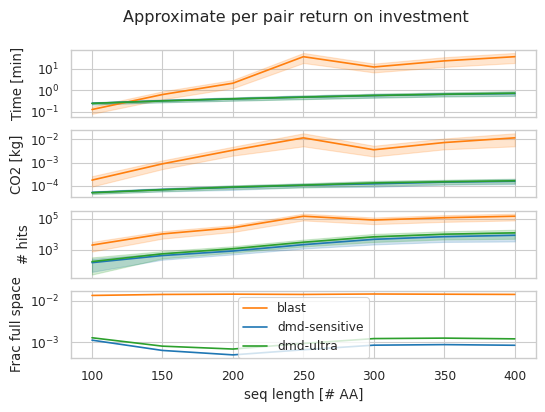

In [17]:
fig, axes = plt.subplots(4,1, figsize=(6,4), sharex=True)
for ax in axes[:3]:
    ax.tick_params(axis='x', bottom=False, which='both')
axes[-1].set_xlabel('seq length [# AA]')

params_set = [
    (blast_df, 'blast', 'tab:orange'),
    (ds_df, 'dmd-sensitive', 'tab:blue'),
    (dus_df, 'dmd-ultra', 'tab:green')
]
for params in params_set:
    plot_method(axes, *params)

for ax in axes:
    ax.set_yscale('log')
    
plt.legend()
plt.suptitle('Approximate per pair return on investment')

Interestingly we observe a peak in return on investment (eg number of hits we get divided by maximum number of comparisons) but it is negligible, observe the y axis.

## Given the number of pairs we have, assuming the averages, what is the cost and return?
Using blast

In [18]:
N = 13784

In [19]:
print('Total cpu time in days')
for name, group in df.groupby(['method', 'sensitivity']):
    group = group.drop_duplicates(subset=['seq length'], keep='first').sort_values(by=['seq length'])
    print(f'{name} ###################')
    print(group['apx_minutes_per_pair_avg'] * N/60/24)

Total cpu time in days
('blast', 'sensitive') ###################
52      1.199415
51      5.964221
50     20.045937
22    341.003253
41    113.194778
38    218.063123
30    341.003253
Name: apx_minutes_per_pair_avg, dtype: float64
('diamond', 'sensitive') ###################
21    2.324228
18    3.057552
17    3.734067
16    4.536830
15    5.343722
14    6.099419
13    6.638473
Name: apx_minutes_per_pair_avg, dtype: float64
('diamond', 'ultra-sensitive') ###################
0     2.312797
7     3.017206
8     3.750352
9     4.512142
10    5.405827
11    6.159922
12    6.887698
Name: apx_minutes_per_pair_avg, dtype: float64


In [20]:
print('Total human time in days, assuming 30 workers')
for name, group in df.groupby(['method', 'sensitivity']):
    group = group.drop_duplicates(subset=['seq length'], keep='first').sort_values(by=['seq length'])
    print(f'{name} ###################')
    print(group['apx_minutes_per_pair_avg'] * N/60/24/30 + 25*N/60/60/24/30)

Total human time in days, assuming 30 workers
('blast', 'sensitive') ###################
52     0.172928
51     0.331755
50     0.801145
22    11.499723
41     3.906107
38     7.401718
30    11.499723
Name: apx_minutes_per_pair_avg, dtype: float64
('diamond', 'sensitive') ###################
21    0.210422
18    0.234866
17    0.257416
16    0.284175
15    0.311072
14    0.336261
13    0.354230
Name: apx_minutes_per_pair_avg, dtype: float64
('diamond', 'ultra-sensitive') ###################
0     0.210041
7     0.233521
8     0.257959
9     0.283352
10    0.313142
11    0.338278
12    0.362537
Name: apx_minutes_per_pair_avg, dtype: float64


In [21]:
print('Total carbon cost, in # trans atlantic flights')
for name, group in df.groupby(['method', 'sensitivity']):
    group = group.drop_duplicates(subset=['seq length'], keep='first').sort_values(by=['seq length'])
    print(f'{name} ###################')
    print(group['apx_co2_per_pair_avg'] * N/1000)

Total carbon cost, in # trans atlantic flights
('blast', 'sensitive') ###################
52    0.002423
51    0.012114
50    0.046570
22    0.158310
41    0.048726
38    0.099631
30    0.158310
Name: apx_co2_per_pair_avg, dtype: float64
('diamond', 'sensitive') ###################
21    0.000713
18    0.000949
17    0.001177
16    0.001457
15    0.001681
14    0.001981
13    0.002162
Name: apx_co2_per_pair_avg, dtype: float64
('diamond', 'ultra-sensitive') ###################
0     0.000694
7     0.000934
8     0.001220
9     0.001473
10    0.001835
11    0.002058
12    0.002261
Name: apx_co2_per_pair_avg, dtype: float64


In [22]:
print('Total number of hits for coservative database, in millions')
for name, group in df.groupby(['method', 'sensitivity']):
    group = group.drop_duplicates(subset=['seq length'], keep='first').sort_values(by=['seq length'])
    print(f'{name} ###################')
    print(group['apx_hits_per_pair_avg'] * N/1e6)

Total number of hits for coservative database, in millions
('blast', 'sensitive') ###################
52      27.042054
51     141.787393
50     351.826262
22    1949.285036
41    1108.383932
38    1562.795029
30    1949.285036
Name: apx_hits_per_pair_avg, dtype: float64
('diamond', 'sensitive') ###################
21      2.004710
18      5.756974
17     11.241283
16     28.830098
15     63.519687
14     94.232593
13    115.510781
Name: apx_hits_per_pair_avg, dtype: float64
('diamond', 'ultra-sensitive') ###################
0       2.352756
7       7.409762
8      15.849877
9      41.440304
10     92.239513
11    135.973560
12    165.831858
Name: apx_hits_per_pair_avg, dtype: float64


## Make a table of results for better comparison of methods

In [23]:
import numpy

In [24]:
def make_table(df, length=250, sample_size=100):
    df_ = df[df['seq length'] == length].drop_duplicates(subset=['method', 'sensitivity'])
    
    dfs = []
    for i, row in df_.iterrows():
        id_ = [row['method'] + '-'+row['sensitivity']] * sample_size
    
        human_time = row['apx_minutes_per_pair_avg'] * N/60/24/30 + 25*N/60/60/24/30 # note some extra overhead for worker startup
        human_time_std = row['apx_minutes_per_pair_std'] * N/60/24/30
        human_time_sample = numpy.random.normal(loc=human_time, scale=human_time_std, size=sample_size)

        co2 = row['apx_co2_per_pair_avg'] * N/1000
        co2_std = row['apx_co2_per_pair_std'] * N/1000
        co2_samp = numpy.random.normal(loc=co2, scale=co2_std, size=sample_size)

        hits = row['apx_hits_per_pair_avg'] * N/1e6
        hits_std = row['apx_hits_per_pair_std'] * N/1e6
        hits_samp = numpy.random.normal(loc=hits, scale=hits_std, size=sample_size)
        
        dfs.append(pd.DataFrame(
            {
                'method': id_,
                'Time [days]': human_time_sample,
                'CO2 [t. atl. flights]': co2_samp,
                'Hits [mil]': hits_samp
            }
        ))
    df_results = pd.concat(dfs, ignore_index=True)                    
    
    
    return df_results

In [25]:
results_sample = make_table(df)

In [26]:
import seaborn as sns
sns.set_context('paper')

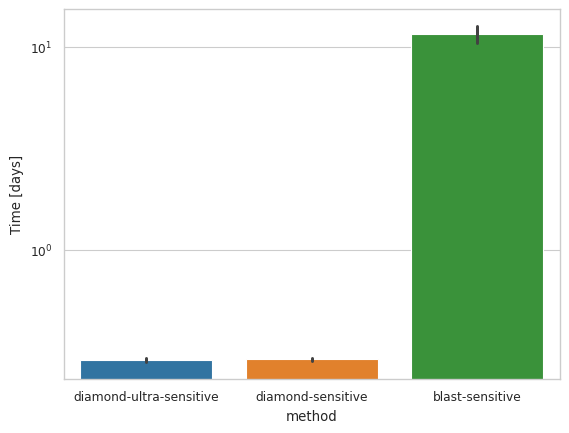

In [27]:
fig, ax = plt.subplots()
sns.barplot(data=results_sample, x='method', y='Time [days]', ax = ax)
ax.set_yscale('log')

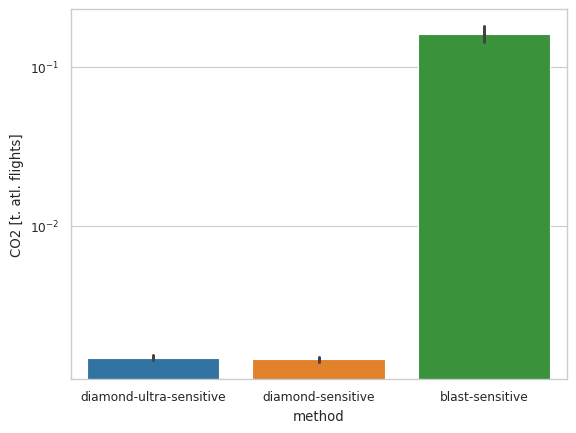

In [28]:
fig, ax = plt.subplots()
sns.barplot(data=results_sample, x='method', y='CO2 [t. atl. flights]', ax = ax)
ax.set_yscale('log')

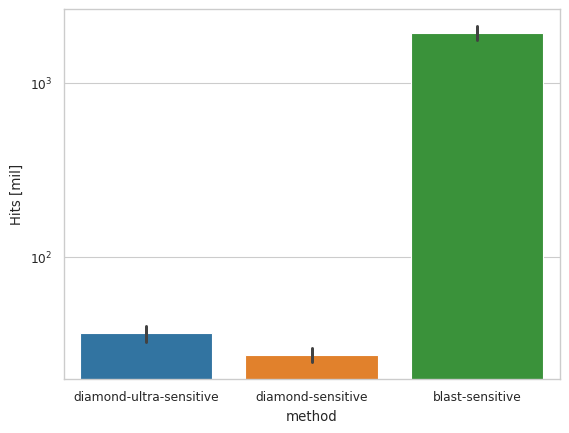

In [29]:
fig, ax = plt.subplots()
sns.barplot(data=results_sample, x='method', y='Hits [mil]', ax = ax)
ax.set_yscale('log')